GRIP TASK 6: Prediction using Decision Tree Algorithm   
Author: Rahul Bajaj   
Create the Decision Tree classifier and visualize it graphically.   
The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

In [15]:
import pandas as pd
import seaborn as sns
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

In [17]:
data=sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [18]:
data.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [19]:
X=data.drop(columns=['species'])
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [20]:
y=data['species']
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [21]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [22]:
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [23]:
feature_name=list(X.columns)
class_name=list(y.unique())
print(feature_name)
print(class_name)

['sepal_length', 'sepal_width', 'petal_length', 'petal_width']
['setosa', 'versicolor', 'virginica']


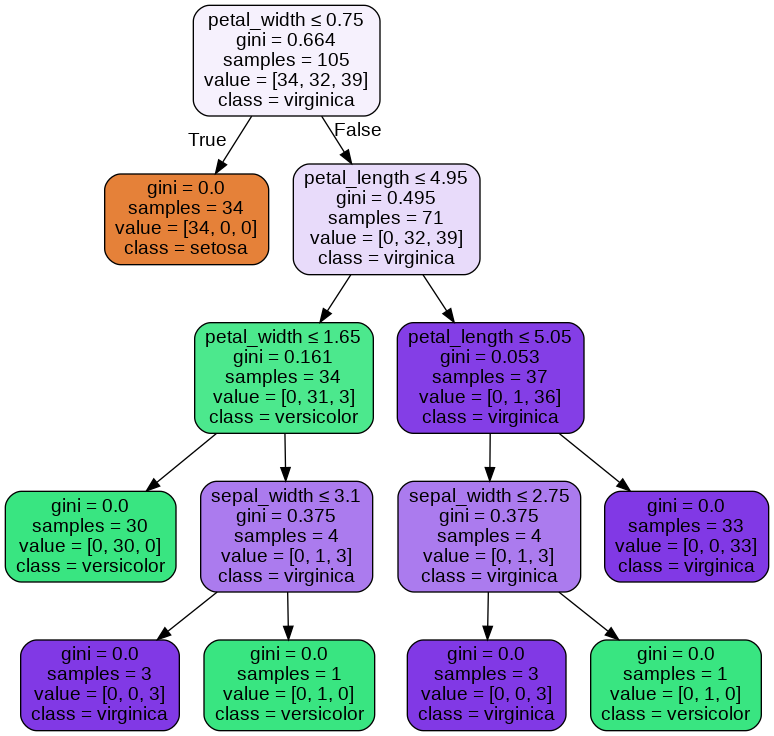

In [24]:
dot_data = StringIO()
export_graphviz(dt, out_file=dot_data, feature_names=feature_name,  
                filled=True, rounded=True,
                special_characters=True,
                class_names=class_name,)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [25]:
dt.score(X_test,y_test)

0.9777777777777777

In [26]:
data.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [27]:
y_pred=dt.predict(([[5.1,3.5,1.4,0.2]]))
y_pred

array(['setosa'], dtype=object)

In [28]:
#when petal width = 0.65 we should get setosa
y_pred=dt.predict(([[1,1,1,0.65]]))
y_pred

array(['setosa'], dtype=object)

In [29]:
#when petal width > 0.75, if petal_length < 4.95 then left side of graph
y_pred=dt.predict(([[1,1,4,1]]))
y_pred

array(['versicolor'], dtype=object)